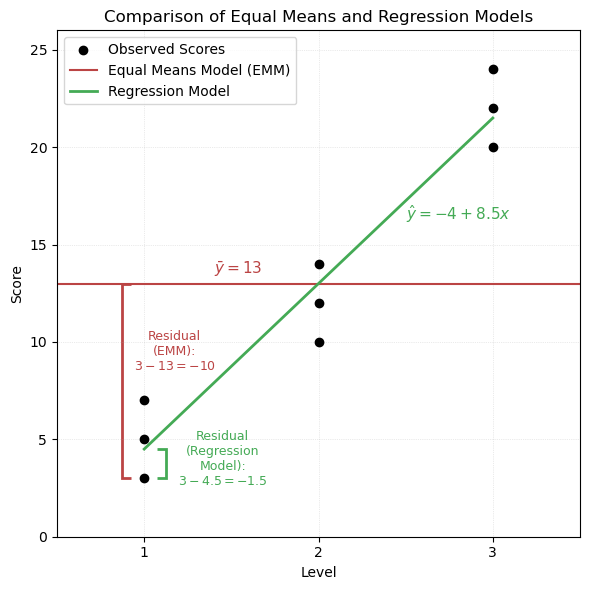

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import PathPatch
from matplotlib.path import Path

# Data
levels = np.repeat([1, 2, 3], 3)
scores = np.array([3, 5, 7, 10, 12, 14, 20, 22, 24])
x_vals = np.array([1, 2, 3])
grand_mean = np.mean(scores)

# Regression
slope = 8.5
intercept = -4
fitted_scores = intercept + slope * levels

# Highlighted residual (Level 1, Score = 3)
highlight_x = 1
highlight_y = 3
highlight_yhat = intercept + slope * highlight_x  # = 4.5

# Bracket shape settings
bracket_depth = 0.05

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xticks(x_vals)
ax.set_xticklabels(['1', '2', '3'])
ax.set_xlabel("Level")
ax.set_ylabel("Score")
ax.set_title("Comparison of Equal Means and Regression Models")

# Observed points
ax.scatter(levels, scores, color='black', zorder=5, label='Observed Scores')

# Equal Means Model line
ax.axhline(grand_mean, color='#BB4444', linestyle='-', linewidth=1.5, label='Equal Means Model (EMM)')

# Regression Model line
reg_x = np.array([1, 3])
reg_y = intercept + slope * reg_x
ax.plot(reg_x, reg_y, color='#44AA55', linewidth=2, label='Regression Model')

# Residual bracket (Equal Means Model)
x_pos = highlight_x - 0.075
verts = [
    (x_pos, highlight_y),
    (x_pos - bracket_depth, highlight_y),
    (x_pos - bracket_depth, grand_mean),
    (x_pos, grand_mean)
]
codes = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO]
path = Path(verts, codes)
patch = PathPatch(path, color='#BB4444', lw=2, fill=False)
ax.add_patch(patch)
# ax.text(x_pos + 0.25, (highlight_y + grand_mean)/2 + 1,
#         r"$3 - 13 = -10$", color='#BB4444', fontsize=10,
#         va='center', ha='center')
ax.text(
    x_pos + 0.25, (highlight_y + grand_mean)/2 + 1.5,
    "Residual\n(EMM):\n" + r"$3 - 13 = -10$",
    color='#BB4444', fontsize=9,
    va='center', ha='center'
)


# Residual bracket (Regression Model)
x_pos_r = highlight_x + 0.075
verts_r = [
    (x_pos_r, highlight_y),
    (x_pos_r + bracket_depth, highlight_y),
    (x_pos_r + bracket_depth, highlight_yhat),
    (x_pos_r, highlight_yhat)
]
codes_r = [Path.MOVETO, Path.LINETO, Path.LINETO, Path.LINETO]
path_r = Path(verts_r, codes_r)
patch_r = PathPatch(path_r, color='#44AA55', lw=2, fill=False)
ax.add_patch(patch_r)
# ax.text(x_pos_r + 0.375, (highlight_y + highlight_yhat)/2,
#         r"$3 - 4.5 = -1.5$", color='#44AA55', fontsize=10,
#         va='center', ha='center')
ax.text(x_pos_r + 0.375, (highlight_y + highlight_yhat)/2 + 0.25,
        "Residual\n(Regression\nModel):\n" + r"$3 - 4.5 = -1.5$", color='#44AA55', fontsize=9,
        va='center', ha='center')

# Mean and regression equation labels
ax.text(1.4, grand_mean + 0.5, r'$\bar{y} = 13$', color='#BB4444', fontsize=11)
ax.text(2.5, intercept + slope * 2.5 - 1, r'$\hat{y} = -4 + 8.5x$', color='#44AA55', fontsize=11, fontweight='bold')

# Grid and layout
ax.set_xlim(0.5, 3.5)
ax.set_ylim(0, 26)
ax.grid(True, which='both', linestyle=':', linewidth=0.5, alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()


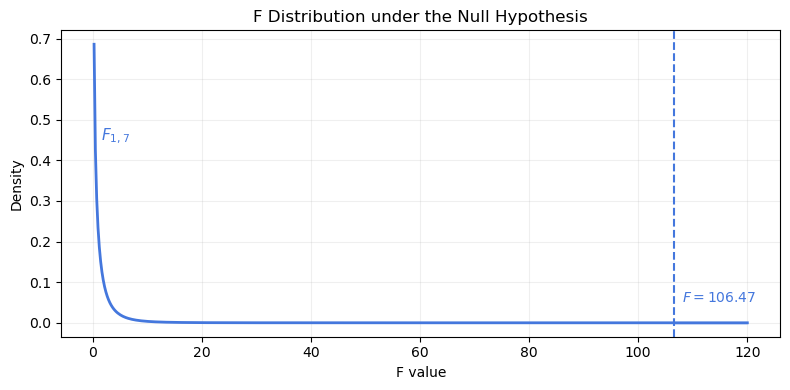

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Parameters for the F-distribution
df_model = 1   # numerator df
df_error = 7   # denominator df
F_stat = 106.47

# Generate F-distribution values
x = np.linspace(0, 120, 500)
y = f.pdf(x, df_model, df_error)

# Plot the F-distribution curve
plt.figure(figsize=(8, 4))
plt.plot(x, y, color='#4477DD', lw=2)

# Shade the area beyond the F-statistic
x_shade = np.linspace(F_stat, 120, 200)
y_shade = f.pdf(x_shade, df_model, df_error)
plt.fill_between(x_shade, y_shade, color='#4477DD', alpha=0.4, label='p < 0.0001')

# Add vertical line at observed F-statistic
plt.axvline(F_stat, color='#4477DD', linestyle='--', lw=1.5)
plt.text(F_stat + 1.5, 0.05, r'$F = 106.47$', color='#4477DD', fontsize=10, fontweight='bold')

# Annotations
# plt.text(60, 0.02, 'Reject $H_0$: EMM', color='#BB4444', fontsize=12)
# plt.text(10, 0.02, 'Regression model', color='#44AA55', fontsize=12)
plt.text(1.5, 0.45, '$F_{1,7}$', color='#4477DD', fontsize=11, fontweight='bold')

# Axis and title
plt.xlabel('F value')
plt.ylabel('Density')
plt.title('F Distribution under the Null Hypothesis')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()


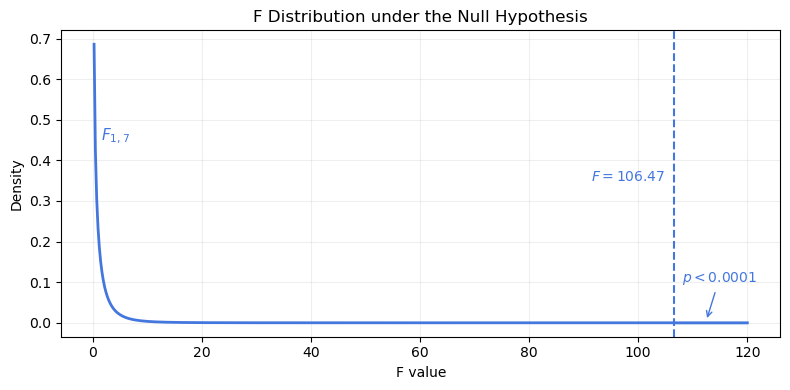

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Parameters for the F-distribution
df_model = 1   # numerator df
df_error = 7   # denominator df
F_stat = 106.47

# Generate F-distribution values
x = np.linspace(0, 120, 500)
y = f.pdf(x, df_model, df_error)

# Create the figure and axis object
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the F-distribution
ax.plot(x, y, color='#4477DD', lw=2)

# Shade rejection region
x_shade = np.linspace(F_stat, 120, 200)
y_shade = f.pdf(x_shade, df_model, df_error)
ax.fill_between(x_shade, y_shade, color='#4477DD', alpha=0.4, label='p < 0.0001')

# Vertical line for F-stat
ax.axvline(F_stat, color='#4477DD', linestyle='--', lw=1.5)
ax.text(F_stat - 1.5, 0.35, r'$F = 106.47$', color='#4477DD', fontsize=10, fontweight='bold', ha='right')

# Add curve label
ax.text(1.5, 0.45, '$F_{1,7}$', color='#4477DD', fontsize=11, fontweight='bold')

# Annotate p-value with arrow
ax.annotate(r'$p < 0.0001$', 
            xy=(F_stat + 6, 0.005), 
            xytext=(F_stat + 1.5, 0.1), 
            arrowprops=dict(arrowstyle='->', color='#4477DD'),
            fontsize=10, color='#4477DD')

# Labels and title
ax.set_xlabel('F value')
ax.set_ylabel('Density')
ax.set_title('F Distribution under the Null Hypothesis')
ax.grid(alpha=0.2)
plt.tight_layout()
plt.show()


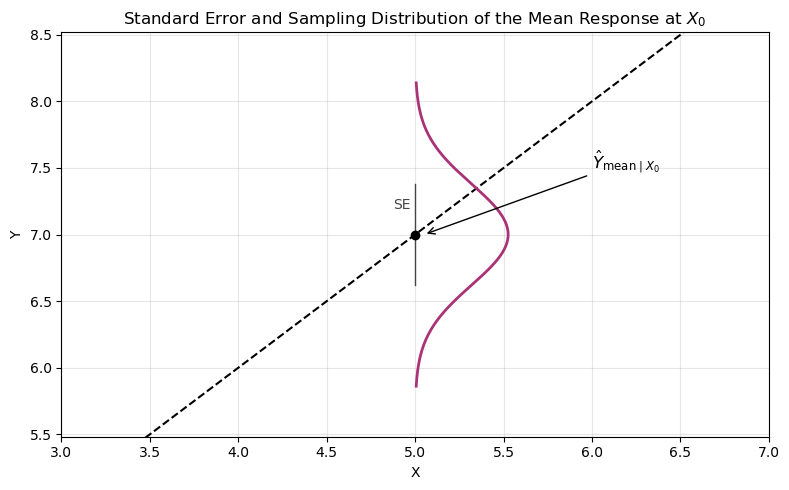

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
X_0 = 5
beta_0 = 2
beta_1 = 1
sigma = 1.2
n = 10
X_bar = 5
S_X2 = 2.5

# Prediction at X_0
Y_hat = beta_0 + beta_1 * X_0

# SE of the mean prediction
SE = sigma * np.sqrt(1/n + (X_0 - X_bar)**2 / ((n - 1) * S_X2))

# Generate regression line
X_vals = np.linspace(1, 9, 100)
Y_vals = beta_0 + beta_1 * X_vals

# Generate sideways bell-shaped curve
y_density = np.linspace(Y_hat - 3*SE, Y_hat + 3*SE, 300)
x_density = norm.pdf(y_density, loc=Y_hat, scale=SE)
x_curve = X_0 + x_density * 0.5  # scaled for visibility

# Plot setup
fig, ax = plt.subplots(figsize=(8, 5))

# Regression line
ax.plot(X_vals, Y_vals, label="Regression Line", color='black', linestyle='--')

# Confidence interval at X_0
ax.plot([X_0, X_0], [Y_hat - SE, Y_hat + SE], color='#444444', lw=1)
ax.scatter([X_0], [Y_hat], color='black', zorder=5)

# Sideways bell curve
ax.plot(x_curve, y_density, color="#AA3377", lw=2)

# Label and annotation
ax.annotate(r'$\hat{Y}_{\text{mean} \mid X_0}$', xy=(X_0+0.05, Y_hat), xytext=(X_0 + 1, Y_hat + 0.5),
             arrowprops=dict(arrowstyle='->'), fontsize=12)
ax.annotate('SE', xy=(X_0 - 0.125, Y_hat + SE/2), fontsize=10, color='#444444')

# Axes and styling
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim(3, 7)
ax.set_ylim(Y_hat - 4*SE, Y_hat + 4*SE)
ax.set_title('Standard Error and Sampling Distribution of the Mean Response at $X_0$')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


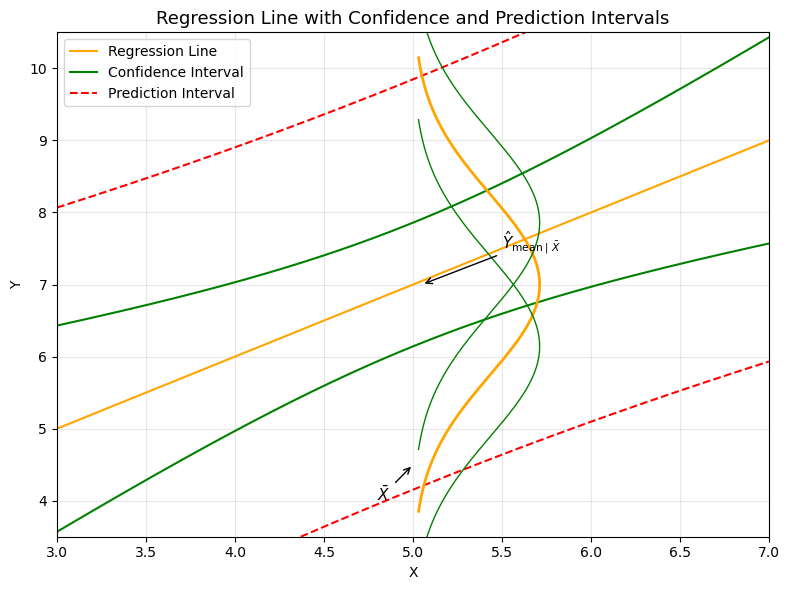

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Model parameters
beta_0 = 2
beta_1 = 1
sigma = 1.2
n = 10
X_bar = 5
S_X2 = 2.5
t_val = 2.262  # t_{alpha/2, n-2} for 95% CI with df = 8

# Generate X range and regression line
X_vals = np.linspace(3, 7, 300)
Y_hat = beta_0 + beta_1 * X_vals

# Standard errors
SE_mean = sigma * np.sqrt(1/n + (X_vals - X_bar)**2 / ((n - 1) * S_X2))
SE_ind = sigma * np.sqrt(1 + 1/n + (X_vals - X_bar)**2 / ((n - 1) * S_X2))

# Confidence and prediction intervals
CI_upper = Y_hat + t_val * SE_mean
CI_lower = Y_hat - t_val * SE_mean
PI_upper = Y_hat + t_val * SE_ind
PI_lower = Y_hat - t_val * SE_ind

# Plot
fig, ax = plt.subplots(figsize=(8, 6))

# Regression line
ax.plot(X_vals, Y_hat, color='orange', label='Regression Line')

# CI bands
ax.plot(X_vals, CI_upper, color='green', linestyle='-', label='Confidence Interval')
ax.plot(X_vals, CI_lower, color='green', linestyle='-')

# PI bands
ax.plot(X_vals, PI_upper, color='red', linestyle='--', label='Prediction Interval')
ax.plot(X_vals, PI_lower, color='red', linestyle='--')

# Vertical density curve at X = X_bar
X_0 = X_bar
Y_0 = beta_0 + beta_1 * X_0
# SE_0 = sigma * np.sqrt(1/n)
# y_vals = np.linspace(Y_0 - 3*SE_0, Y_0 + 3*SE_0, 300)
# density = norm.pdf(y_vals, loc=Y_0, scale=SE_0)
# x_curve = X_0 + 0.4 * density  # scale the width for visibility
# Use prediction SE (wider than mean SE)
SE_0_pred = sigma * np.sqrt(1 + 1/n)
y_vals = np.linspace(Y_0 - 2.5*SE_0_pred, Y_0 + 2.5*SE_0_pred, 300)
density = norm.pdf(y_vals, loc=Y_0, scale=SE_0_pred)

# Scale density to visually span the prediction interval range
pi_width = 2 * t_val * SE_0_pred
x_curve = X_0 + density * (pi_width / np.max(density)) * 0.125

# Draw bell-shaped curve centered at X_bar
ax.plot(x_curve, y_vals, color='orange', lw=2)
ax.plot(x_curve, y_vals-CI_bar, color='green', lw=1)
ax.plot(x_curve, y_vals+CI_bar, color='green', lw=1)

# Reference lines at CI/PI at X_bar
CI_bar = t_val * SE_0
PI_bar = t_val * np.sqrt(sigma**2 + SE_0**2)
# ax.plot([X_0, X_0], [Y_0 - CI_bar, Y_0 + CI_bar], color='green', lw=1.5)
# ax.plot([X_0, X_0], [Y_0 - PI_bar, Y_0 + PI_bar], color='red', lw=1.5, linestyle='--')

# Annotations
ax.annotate(r'$\bar{X}$', xy=(X_bar, Y_0 - 2.5), xytext=(X_bar - 0.2, Y_0 - 3), fontsize=11,
            arrowprops=dict(arrowstyle="->"))
ax.annotate(r'$\hat{Y}_{\text{mean} \mid \bar{X}}$', xy=(X_bar + 0.05, Y_0), xytext=(X_bar + 0.5, Y_0 + 0.5),
            arrowprops=dict(arrowstyle="->"), fontsize=11)

# Aesthetics
ax.set_title("Regression Line with Confidence and Prediction Intervals", fontsize=13)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim(3, 7)
ax.set_ylim(Y_0 - 3.5, Y_0 + 3.5)
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("fch09_CI_PI_bands.png", dpi=300)
plt.show()


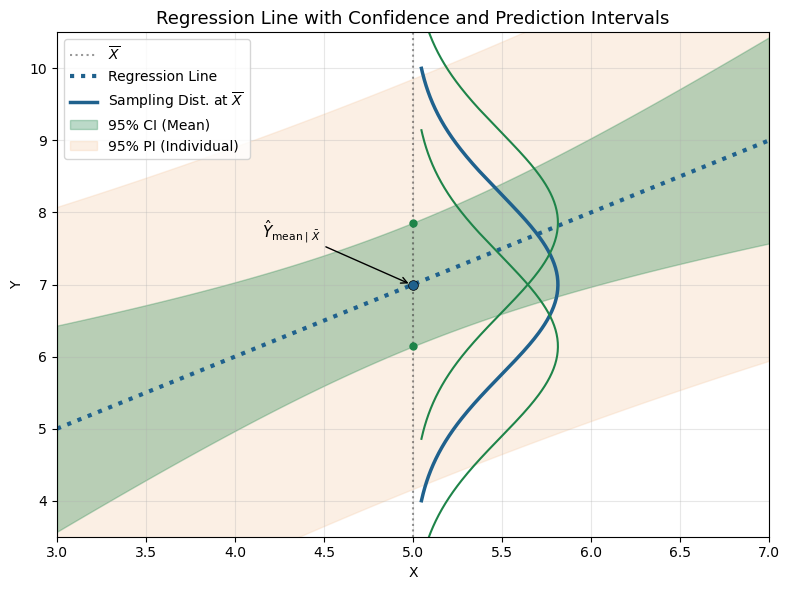

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Model parameters ---
beta_0 = 2
beta_1 = 1
sigma = 1.2
n = 10
X_bar = 5
S_X2 = 2.5
t_val = 2.262  # 95% CI, df = 8

# --- Regression line and interval bands ---
X_vals = np.linspace(3, 7, 300)
Y_hat = beta_0 + beta_1 * X_vals

SE_mean = sigma * np.sqrt(1/n + (X_vals - X_bar)**2 / ((n - 1) * S_X2))
SE_ind  = sigma * np.sqrt(1 + 1/n + (X_vals - X_bar)**2 / ((n - 1) * S_X2))

CI_upper = Y_hat + t_val * SE_mean
CI_lower = Y_hat - t_val * SE_mean
PI_upper = Y_hat + t_val * SE_ind
PI_lower = Y_hat - t_val * SE_ind

# --- Sampling distribution at X̄ ---
Y_0 = beta_0 + beta_1 * X_bar
SE_mean_Xbar = sigma * np.sqrt(1/n)
CI_half_width = t_val * SE_mean_Xbar

y_vals = np.linspace(Y_0 - 2.5 * sigma, Y_0 + 2.5 * sigma, 300)
density = norm.pdf(y_vals, loc=Y_0, scale=sigma * np.sqrt(1 + 1/n))
x_curve = X_bar + density * (2 * t_val * sigma / np.max(density)) * 0.15

# --- Plot ---
fig, ax = plt.subplots(figsize=(8, 6))

# Vertical reference line at X̄
ax.axvline(X_bar, color='black', linestyle=':', alpha=0.4, label='$\overline{X}$')

# Shaded intervals
ax.fill_between(X_vals, PI_lower, PI_upper, color='#F5CBA7', alpha=0.3, label='95% PI (Individual)')
ax.fill_between(X_vals, CI_lower, CI_upper, color='#1E8449', alpha=0.3, label='95% CI (Mean)')

# Regression line and vertical bell curve
ax.plot(X_vals, Y_hat, color='#1F618D', linestyle=':', linewidth=3, label='Regression Line')
ax.plot(x_curve, y_vals, color='#1F618D', lw=2.5, label='Sampling Dist. at $\overline{X}$')
ax.plot(x_curve, y_vals - CI_half_width, color='#1E8449', lw=1.5)
ax.plot(x_curve, y_vals + CI_half_width, color='#1E8449', lw=1.5)

# Mark center and CI bounds
ax.plot(X_bar, Y_0, 'o', color='#1F618D', markeredgecolor='black', markersize=7, markeredgewidth=0.5) #label=r'$\hat{Y}(\bar{X})$',
ax.plot(X_bar, Y_0 + CI_half_width, 'o', color='#1E8449', markersize=5)
ax.plot(X_bar, Y_0 - CI_half_width, 'o', color='#1E8449', markersize=5)

# Annotation: Center point
ax.annotate(r'$\hat{Y}_{\text{mean} \mid \bar{X}}$', 
            xy=(X_bar - 0.01, Y_0), 
            xytext=(X_bar - 0.85, Y_0 + 0.65),
            arrowprops=dict(arrowstyle="->"), fontsize=11)

# # CI bound annotations
# ax.annotate(r'$+\ t \cdot SE_{\text{mean}}$', 
#             xy=(X_bar, Y_0 + CI_half_width),
#             xytext=(X_bar + 0.8, Y_0 + CI_half_width + 0.5),
#             arrowprops=dict(arrowstyle="->", color='#1E8449'),
#             fontsize=10, color='#1E8449')

# ax.annotate(r'$-\ t \cdot SE_{\text{mean}}$', 
#             xy=(X_bar, Y_0 - CI_half_width),
#             xytext=(X_bar + 0.8, Y_0 - CI_half_width - 0.5),
#             arrowprops=dict(arrowstyle="->", color='#1E8449'),
#             fontsize=10, color='#1E8449')

handles, labels = ax.get_legend_handles_labels()
order = [0, 3, 4, 2, 1]  # Adjust these indices based on actual legend order
ax.legend([handles[idx] for idx in order],
          [labels[idx] for idx in order])

# --- Final touches ---
ax.set_title("Regression Line with Confidence and Prediction Intervals", fontsize=13)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_xlim(3, 7)
ax.set_ylim(Y_0 - 3.5, Y_0 + 3.5)
ax.grid(True, alpha=0.3)
plt.tight_layout()
# plt.savefig("../images/fch09_CI_PI_intervals.png", dpi=300)
plt.show()


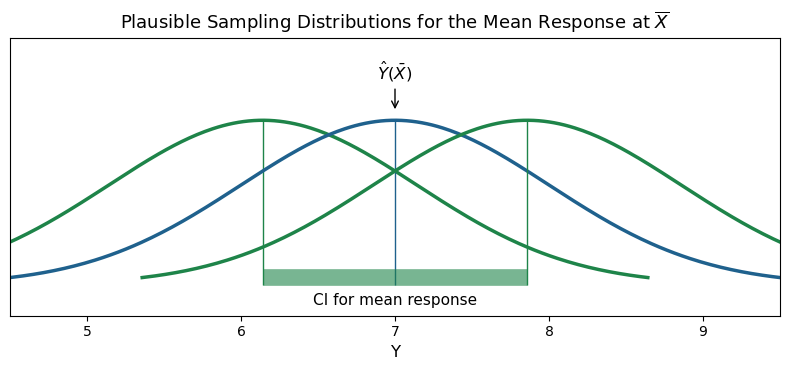

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# --- Model parameters from earlier ---
beta_0 = 2
beta_1 = 1
sigma = 1.2
n = 10
X_bar = 5
t_val = 2.262  # 95% CI, df = 8

# --- Mean response and SE at X̄ ---
Y_0 = beta_0 + beta_1 * X_bar  # should be 7
SE_mean_Xbar = sigma * np.sqrt(1 / n)
CI_half_width = t_val * SE_mean_Xbar
CI_bounds = [Y_0 - CI_half_width, Y_0 + CI_half_width]

# --- Colors ---
blue = '#1F618D'
green = '#1E8449'
# orange = '#EB984E'

# --- Generate plausible mean locations within CI ---
mean_vals = np.linspace(CI_bounds[0], CI_bounds[1], 3)  # 3 plausible means
y = np.linspace(-2.5, 2.5, 300)
densities = [norm.pdf(y, loc=0, scale=1) for _ in mean_vals]  # standardized

# --- Horizontal layout ---
fig, ax = plt.subplots(figsize=(8, 3.8))

# Plot each density horizontally
for i, mu in enumerate(mean_vals):
    color = blue if np.isclose(mu, Y_0) else green
    ax.plot(mu + y, densities[i], color=color, lw=2.5)
    ax.vlines(mu, ymin=0, ymax=norm.pdf(0), color=color, lw=1)

# Annotate center
ax.annotate(r'$\hat{Y}(\bar{X})$', 
            xy=(Y_0, norm.pdf(0) + 0.02), 
            xytext=(Y_0, norm.pdf(0) + 0.1),
            ha='center', fontsize=12, arrowprops=dict(arrowstyle='->'))

# Confidence interval line
# ax.hlines(y=0, xmin=Y_0 - 2.5, xmax=Y_0 + 2.5, color='black', lw=1, alpha=0.6)
ax.hlines(y=0.02, xmin=CI_bounds[0], xmax=CI_bounds[1], 
          color=green, lw=12, alpha=0.6)
ax.text(Y_0, -0.05, "CI for mean response", ha='center', fontsize=11)

# Axes formatting
ax.set_xlim(Y_0 - 2.5, Y_0 + 2.5)
ax.set_ylim(-0.075, norm.pdf(0) + 0.2)
ax.set_yticks([])
# ax.set_xticks([])
ax.set_xlabel("Y", fontsize=12)
ax.set_title("Plausible Sampling Distributions for the Mean Response at $\overline{X}$", fontsize=13)
# ax.grid(True, alpha=0.3)
# ax.spines[['left', 'right', 'top']].set_visible(False)

plt.tight_layout()
# plt.savefig("../images/fch09_CI_mean_distributions.png", dpi=300)
plt.show()
